In [1]:
from pathlib import Path

In [2]:
plot_path = Path('Plots')

In [58]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_{case}_{_x}_{_y}_lev_-2.png'
    return plot_path /f

In [4]:
plot_path.mkdir(exist_ok=True, parents=True)

## Load observations: 

In [5]:
import pandas as pd

In [6]:
from bs_fdbck.constants import measurements_path

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)


In [7]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )

### Yearly medians:


In [8]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)

df_hyy_1y.head()
df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
                            'T (degree C).1':'T (degree C)',
                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
                             'N100 (cm^-3).1':'N100 (cm^-3)'
                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1y

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/excel/_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)
0,2012,14.819834,2.286611,485.015920
1,2013,16.061833,2.266324,458.851509
2,2014,18.469334,4.102861,706.239261
3,2015,14.949500,2.167607,499.026618
4,2016,13.959500,1.693031,418.417730
5,2017,13.619333,1.845648,409.297699
6,2018,17.848833,3.366803,770.183131


In [9]:
df_hyy_1y['year'] = df_hyy_1y['year'].apply(lambda x:f'{x:.0f}')

In [10]:
df_hyy_1y['date'] = df_hyy_1y['year']
df_hyy_1y = df_hyy_1y.set_index('date')

In [11]:
import pandas as pd

In [12]:
df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )

In [13]:
df_hyy_1 = df_hyy_1.set_index('date')

<AxesSubplot:ylabel='Frequency'>

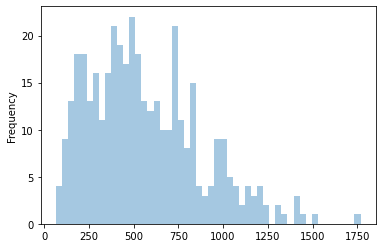

In [14]:
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')


## load models:

## Read in model data. 

In [15]:
from bs_fdbck.preprocess.launch_monthly_station_collocation import launch_monthly_station_output
from bs_fdbck.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.data_info.variable_info import list_sized_vars_nonsec, list_sized_vars_noresm
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
import numpy as np

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

## Settings:

In [19]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [20]:
from_t = '2011-01-01'
to_t = '2015-01-01'

## Cases:

In [21]:
cases_sec = ['OsloAeroSec_intBVOC_f19_f19']#'SECTv21_ctrl_def','SECTv11_noresm2_ctrl', 'SECTv11_ctrl_fbvoc','SECTv11_noresm2_adj','SECTv11_noresm2_eq18']#'SECTv11_noresm2_NFHIST']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig = ['OsloAero_intBVOC_f19_f19']#, 'noSECTv21_ox_ricc']#'noSECTv11_noresm2_ricc', 'noSECTv11_noresm2_ctrl', 'noSECTv11_ctrl_fbvoc','noSECTv11_ctrl']#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl

In [22]:
case_mod = cases_orig[0]

In [23]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2021-12-08 16:32:53,951 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


2021-12-08 16:32:53,951 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


In [24]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 


In [25]:
for case_name in cases_sec:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')
for case_name in cases_orig:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS
UUUPS


In [26]:
dic_ds = dict()
for ca in cases_orig + cases_sec:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    dic_ds[ca]=ds

2021-12-08 16:32:54,238 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/H2SO4_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocate

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/H2SO4_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/SOA_LV_OsloAero_int

2021-12-08 16:32:59,430 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/N100_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD500_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD440_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/ACTREL_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/H2SO4_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/N100_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD500_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD440_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/ACTREL_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/H2SO4_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_in

In [27]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [30]:

def get_dic_df_mod(model_lev_i=-1):
    dic_df = dict()
    dic_df_sm = dict()

    for ca in dic_ds.keys():
        ds = dic_ds[ca]
        ds_sel = ds.sel(station='SMR').isel( lev=model_lev_i)
        rho = pressure*100/(R*ds_sel['T'])
    
        ds_sel['rho'] = rho.load()
        df = ds_sel.to_dataframe()
        ls_so4 = [c for c in df.columns if 'SO4_' in c]#['SO4_NA']

        for s in ['SOA_NA','SOA_A1','OM_AC','OM_AI','OM_NI']+ls_so4:
            un = '$\micro$g/m3'
            if ds_sel[s].attrs['units']!=un:
                ds_sel[s] = ds_sel[s]*ds_sel['rho']*kg2ug
                ds_sel[s].attrs['units']=un

        df = ds_sel.to_dataframe()
        df = df.drop([co for co in df.columns if (('lat_' in co)|('lon_' in co))], 
                     axis=1)

        df['SOA'] = df['SOA_NA'] + df['SOA_A1']

        df['OA'] = df['SOA_NA'] + df['SOA_A1'] +df['OM_AC']+df['OM_AI']+df['OM_NI']
        df['POA'] = df['OM_AC']+df['OM_AI']+df['OM_NI']
    
        df['SO4']=0
        for s in ls_so4:
            df['SO4'] = df['SO4'] + df[s]
    
    
        df_daily = df.resample('D').median()

        months = (df_daily.index.month==7 )|(df_daily.index.month==8  )

        df_s = df_daily[months]
        df_s.loc[:,'year'] = df_s.index.year.values

        df_s.loc[:,'T_C'] = df_s['T'].values-273.15
        df_s.index = df_s.index.rename('date')
        df_merge = pd.merge(df_s, df_hyy_1, right_on='date', left_on='date')
        
        df_merge['year'] = df_merge.index.year

        
        dic_df[ca] = df_merge
        print(ca)
    
        months = (df.index.month==7 )|(df.index.month==8  )

        df_s = df[months]
        df_ym = df_s.resample('Y').median()
        df_ym.loc[:,'year'] = df_ym.index.year.values

        df_ym.loc[:,'T_C'] = df_ym['T'].values-273.15
        
        dic_df_sm[ca] = df_ym
        print(ca)
    return dic_df_sm, dic_df


dic_df_sm, dic_df = get_dic_df_mod(model_lev_i=-2)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19
OsloAero_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
import numpy as np

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [34]:
cols = [
    #'#ffff33',
    '#0074c3',
    '#eb4600',
    '#f8ae00',
    '#892893',
    '#66ae00',
    '#00c1f3',
    '#b00029',
]

In [35]:
from matplotlib import cm

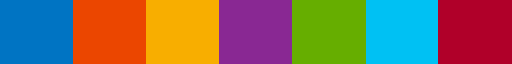

In [36]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

my_cmap = ListedColormap(cols)

my_cmap

In [37]:
type(df_hyy_1['year'][0])

numpy.int64

In [38]:
col_dic = {}
for y,c in zip(range(2012, 2019), cols):
    col_dic[y] =c

No handles with labels found to put in legend.


coefficient of determination: 0.4823830982021349
intercept: [-3.4787266]
slope: [[0.3076495]]


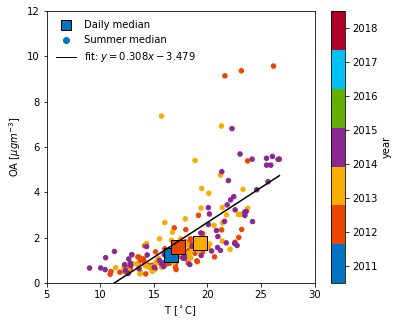

In [39]:
v_x = 'T_C'
v_y = 'OA'
ca = cases_orig[0]
df_s = dic_df[ca]
#def plot(v_x, 
fig, ax = plt.subplots(figsize=[6,5])
#for y,co in zip(df_s['year'].unique(), cols):
    
#    _df = df_s[df_s['year']==y]
df_s.plot.scatter(x=v_x,y=v_y, ax=ax, c = 'year',cmap = my_cmap, vmax=2018.5, vmin=2010.5)#, label=y )#, c='year', cmap='Paired')
for y,co in zip(df_s['year'].unique(), cols):
    df_s = dic_df_sm[ca]

    _dfm = df_s[df_s['year']==y]
    
    #_dfm = _df.median()
    ax.scatter(_dfm[v_x],_dfm[v_y],c=co, label='__nolegend__' , marker='s', s=200, edgecolor='k')

df_s = dic_df[ca]#[years>2011]
x = np.array(df_s[v_x].values).reshape(-1,1)
y=np.array(df_s[v_y].values).reshape(-1,1)

model = LinearRegression().fit(x,y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)
x_s = np.linspace(x.min(),x.max(),10)
a = model.coef_[0]
b = model.intercept_[0]
lab = r'fit: $y= %.3fx %.3f$' %(a,b)
ax.plot(x_s, (a*x_s + b), c='k')
plt.legend(frameon=False, bbox_to_anchor=(1,1,))
#ax.hlines(2000, 5,30, color='k', linewidth=1)

ax.set_ylim([0,12])
ax.set_xlim([5,30])
ax.set_xlabel(r'T [$^\circ$C]')
ax.set_ylabel(r'OA [$\mu g m^{-3}$]')


from matplotlib.lines import Line2D
from matplotlib.patches import Patch

custom_lines = [
    Line2D([0], [0],  color='#0074c3',marker='s',markeredgecolor='k',markersize=10, linewidth=0),
    Line2D([0], [0], color='#0074c3',marker='o', linewidth=0),
    Line2D([0], [0], color='k', lw=1),
                #Patch( color='b', lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)
               ]

ax.legend(custom_lines, ['Daily median', 'Summer median',lab,],frameon=False,
          loc='upper left')

In [40]:
col_dic

{2012: '#0074c3',
 2013: '#eb4600',
 2014: '#f8ae00',
 2015: '#892893',
 2016: '#66ae00',
 2017: '#00c1f3',
 2018: '#b00029'}

In [41]:
df_s['year'].unique()

array([2012, 2013, 2014])

In [42]:
def plot_scatter(v_x,v_y, df_s, df_sy,ca, 
                 xlims=None, 
                 ylims=None,
                 xlab = None,
                 ylab = None,
                 figsize=[6,5],
                 ax = None,
                 #fig = None
                ):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()
    #for y,co in zip(df_s['year'].unique(), cols):
    
    #    _df = df_s[df_s['year']==y]
    _cols = [col_dic[int(y)] for y in df_s['year'].unique()]
    _my_cmap = ListedColormap(_cols)
    df_s.plot.scatter(x=v_x,y=v_y, ax=ax, 
                      c = 'year',
                      cmap = my_cmap, 
                      vmax=2018.5, vmin=2011.5)#, label=y )#, c='year', cmap='Paired')
    #df_sy = df_s.resample('Y').median()
    for y,co in zip(df_sy['year'].unique(), cols):
        #df_sy = dic_df_sm[ca]
        co = col_dic[int(y)]
        _dfm = df_sy[df_sy['year']==y]
    
        #_dfm = _df.median()
        ax.scatter(_dfm[v_x],_dfm[v_y],c=co, label='__nolegend__' , marker='s', s=200, edgecolor='k')
    
    _df_s = df_s[df_s[v_x].notnull() & df_s[v_y].notnull()]
    x = np.array(_df_s[v_x].values).reshape(-1,1)
    y=np.array(_df_s[v_y].values).reshape(-1,1)

    model = LinearRegression().fit(x,y)

    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)

    print('intercept:', model.intercept_)

    print('slope:', model.coef_)
    x_s = np.linspace(x.min(),x.max(),10)
    a = model.coef_[0]
    b = model.intercept_[0]
    lab = r'fit: $y= %.3fx %.3f$' %(a,b)
    ax.plot(x_s, (a*x_s + b), c='k')
    plt.legend(frameon=False, bbox_to_anchor=(1,1,))
    #ax.hlines(2000, 5,30, color='k', linewidth=1)

    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)


    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    custom_lines = [
        Line2D([0], [0],  color='#0074c3',marker='s',markeredgecolor='k',markersize=10, linewidth=0),
        Line2D([0], [0], color='#0074c3',marker='o', linewidth=0),
        Line2D([0], [0], color='k', lw=1),
                #Patch( color='b', lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)
               ]

    ax.legend(custom_lines, ['Daily median', 'Summer median',lab,],frameon=False,
          loc='upper left')
    return fig, ax

In [43]:
mask_obs_N = dic_df[ca]['N100 (cm^-3)'].notnull()
mask_obs_OA = dic_df[ca]['OA (microgram m^-3)'].notnull()

## T vs N100

No handles with labels found to put in legend.


coefficient of determination: 0.4936362356520754
intercept: [-800.54114]
slope: [[73.82029]]


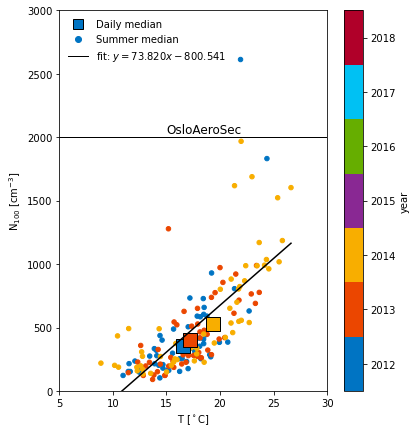

In [44]:
v_x = 'T_C'
v_y = 'N100'
ca = cases_sec[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,3000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.text(15,2030, 'OsloAeroSec', size=12)
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

No handles with labels found to put in legend.


coefficient of determination: 0.4914919159643154
intercept: [-923.5594]
slope: [[82.30394]]
Plots/scat_OsloAero_intBVOC_f19_f19_T_C_N100.png


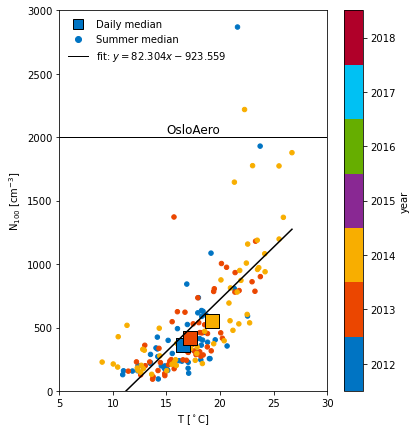

In [45]:
v_x = 'T_C'
v_y = 'N100'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,3000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.text(15,2030, 'OsloAero', size=12)

fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn)

No handles with labels found to put in legend.


coefficient of determination: 0.5050392803771455
intercept: [-530.23737013]
slope: [[68.31557758]]
Plots/scat_OBS_T _N100 .png


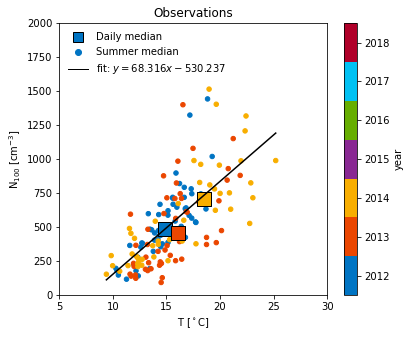

In [46]:

v_x = 'T (degree C)'
v_y = 'N100 (cm^-3)'
ca ='OBS'
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,2000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn)

## OA vs N100

No handles with labels found to put in legend.


coefficient of determination: 0.7329804982825727
intercept: [160.16024689]
slope: [[139.8336719]]


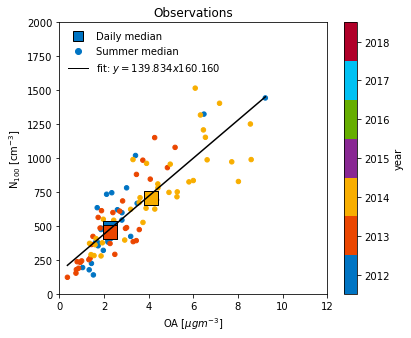

In [47]:

v_x = 'OA (microgram m^-3)'
v_y = 'N100 (cm^-3)'
ca = 'OBS'
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
xlims = [0,12]
ylims = [0,2000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

No handles with labels found to put in legend.


coefficient of determination: 0.8943192019977443
intercept: [34.81244]
slope: [[256.45212]]


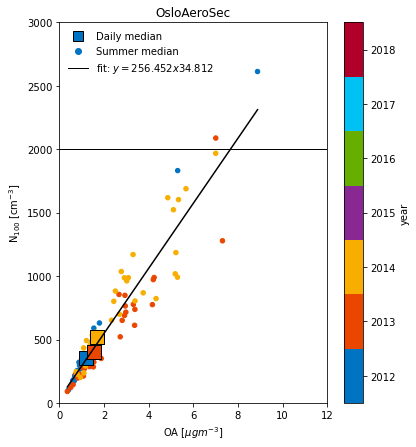

In [59]:
v_x = 'OA'
v_y = 'N100'
ca = cases_sec[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,3000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{100}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

No handles with labels found to put in legend.


coefficient of determination: 0.9126395773969282
intercept: [-4.4190063]
slope: [[288.22403]]


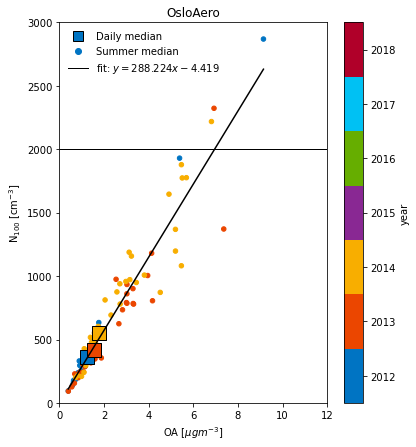

In [60]:
v_x = 'OA'
v_y = 'N100'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,3000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{100}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)

ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

## T vs OA

No handles with labels found to put in legend.


coefficient of determination: 0.39820473400029
intercept: [-3.2317243]
slope: [[0.28984952]]


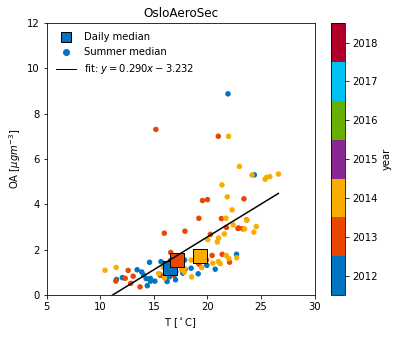

In [61]:
v_x = 'T_C'
v_y = 'OA'
ca = cases_sec[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)


No handles with labels found to put in legend.


coefficient of determination: 0.44856130673203165
intercept: [-2.7102997]
slope: [[0.22436628]]


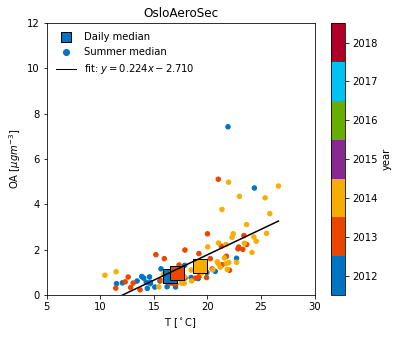

In [62]:
v_x = 'T_C'
v_y = 'SOA'
ca = cases_sec[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'SOA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)


No handles with labels found to put in legend.


coefficient of determination: 0.043279638025710554
intercept: [0.12445199]
slope: [[0.02936583]]


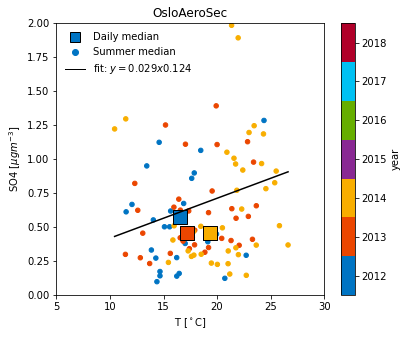

In [52]:
v_x = 'T_C'
v_y = 'SO4'
ca = cases_sec[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,2]
xlab = r'T [$^\circ$C]'
ylab = r'SO4 [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)


No handles with labels found to put in legend.


coefficient of determination: 0.09234485284355753
intercept: [-0.49984753]
slope: [[0.06432056]]


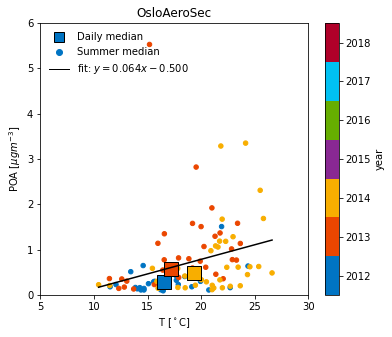

In [53]:
v_x = 'T_C'
v_y = 'POA'
ca = cases_sec[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,6]
xlab = r'T [$^\circ$C]'
ylab = r'POA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)


No handles with labels found to put in legend.


coefficient of determination: 0.4071607474405321
intercept: [-3.3989053]
slope: [[0.29956675]]


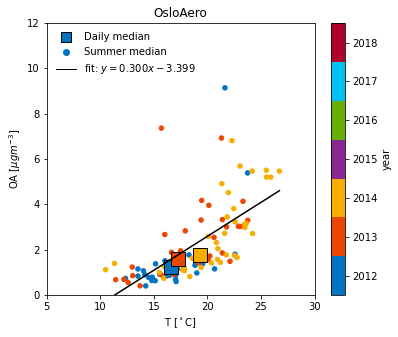

In [63]:
v_x = 'T_C'
v_y = 'OA'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

No handles with labels found to put in legend.


coefficient of determination: 0.550104536875424
intercept: [-4.10142489]
slope: [[0.43023124]]


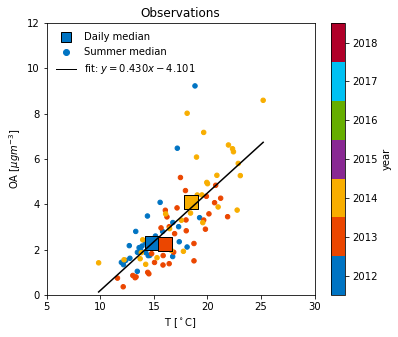

In [55]:
v_x = 'T (degree C)'
v_y = 'OA (microgram m^-3)'
ca = 'OBS'
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc['2012':'2014']
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)

ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [56]:
df_hyy_1y

,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)
date,,,,
2012,2012,14.819834,2.286611,485.015920
2013,2013,16.061833,2.266324,458.851509
2014,2014,18.469334,4.102861,706.239261
2015,2015,14.949500,2.167607,499.026618
2016,2016,13.959500,1.693031,418.417730
2017,2017,13.619333,1.845648,409.297699
2018,2018,17.848833,3.366803,770.183131


## All data: 

No handles with labels found to put in legend.


coefficient of determination: 0.63075713228574
intercept: [-3.92871075]
slope: [[0.42275072]]


(<Figure size 432x360 with 2 Axes>,
 <AxesSubplot:xlabel='T [$^\\circ$C]', ylabel='OA [$\\mu g m^{-3}$]'>)

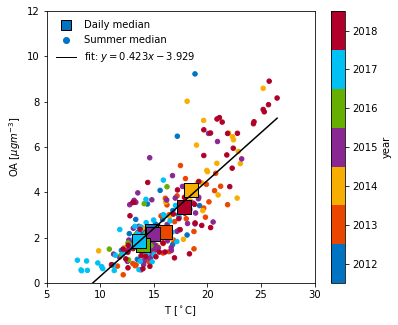

In [57]:

v_x = 'T (degree C)'
v_y = 'OA (microgram m^-3)'
ca = cases_orig[0]
df_s = df_hyy_1

df_sy = df_hyy_1y#df_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)

## Only to 2014

No handles with labels found to put in legend.


coefficient of determination: 0.550104536875424
intercept: [-4.10142489]
slope: [[0.43023124]]


(<Figure size 432x360 with 2 Axes>,
 <AxesSubplot:xlabel='T [$^\\circ$C]', ylabel='OA [$\\mu g m^{-3}$]'>)

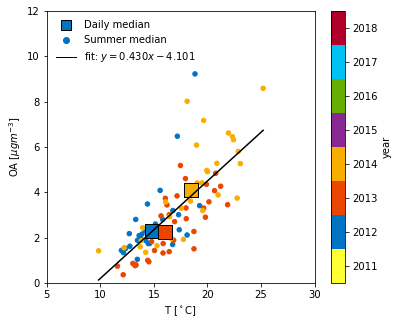

In [142]:

v_x = 'T (degree C)'
v_y = 'OA (microgram m^-3)'
ca = cases_orig[0]
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc[0:2] #f_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)

In [140]:
df_hyy_1y.loc['2012':'2014']

,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)


In [139]:
df_hyy_1.loc['2012':'2014']

,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3)
date,,,,,,
2012-07-01,2012,7,1,17.308417,3.014541,781.245471
2012-07-02,2012,7,2,16.753084,1.697459,635.103339
2012-07-03,2012,7,3,17.366917,2.350536,745.212064
2012-07-04,2012,7,4,18.099667,2.118566,734.009356
2012-07-05,2012,7,5,19.267666,3.413631,1019.238450
...,...,...,...,...,...,...
2014-08-27,2014,8,27,12.399501,NaN,243.775852
2014-08-28,2014,8,28,12.335750,NaN,208.708834
2014-08-29,2014,8,29,10.637417,NaN,174.618919


In [38]:

df_1 = dic_df[cases_sec[0]].drop([c for c in dic_df[ca].columns if (('lat_' in c)|('lon_' in c))], axis=1)
df_2 = dic_df[cases_orig[0]].drop([c for c in dic_df[ca].columns if (('lat_' in c)|('lon_' in c))], axis=1)
df_1.head()

df_mod_dic = dict(OsloAeroSec=df_1, OsloAero = df_2)

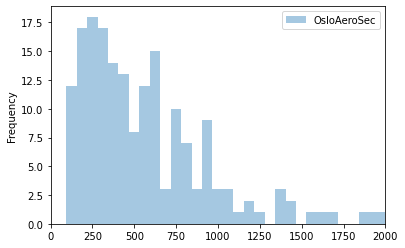

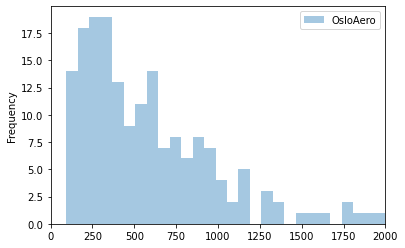

(0.0, 2000.0)

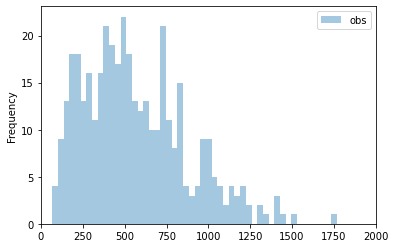

In [31]:

df_1['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAeroSec')
plt.legend()
plt.xlim([0,2000])
plt.show()
df_2['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAero')
plt.legend()
plt.xlim([0,2000])
plt.show()
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')
plt.legend()
plt.xlim([0,2000])

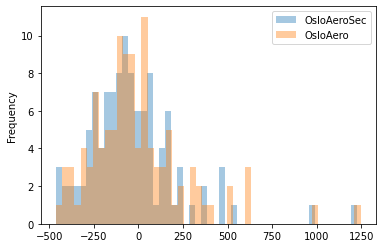

In [32]:
#df_1['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAeroSec')
#df_2['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAero')

(-df_hyy_1['N100 (cm^-3)']+df_1['N100']).plot.hist(bins=50, alpha=0.4, label='OsloAeroSec')
(-df_hyy_1['N100 (cm^-3)']+df_2['N100']).plot.hist(bins=50, alpha=0.4, label='OsloAero')
plt.legend()

In [34]:
def 

,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3)
date,,,,,,
2012-07-01,2012,7,1,17.308417,3.014541,781.245471
2012-07-02,2012,7,2,16.753084,1.697459,635.103339
2012-07-03,2012,7,3,17.366917,2.350536,745.212064
2012-07-04,2012,7,4,18.099667,2.118566,734.009356
2012-07-05,2012,7,5,19.267666,3.413631,1019.238450
...,...,...,...,...,...,...
2018-08-27,2018,8,27,12.378417,1.065071,423.684130
2018-08-28,2018,8,28,13.056500,1.517197,513.888488
2018-08-29,2018,8,29,15.028000,2.148551,720.768715


In [36]:
dic_vars =dict(
    N100='N100 (cm^-3)',
    OA = 'OA (microgram m^-3)',
    T_C = 'T (degree C)',
)

In [40]:
df_1

,ACTREL,lev,BC_A,BC_AC,BC_AI,BC_AX,BC_N,BC_NI,COAGNUCL,DOD440,...,SOA_NA,SS_A1,SS_A2,SS_A3,T,rho,SOA,OA,year,T_C
time,,,,,,,,,,,,,,,,,,,,,
2011-07-01,0.000000,992.556095,1.064449e-10,2.846632e-12,2.130681e-11,7.857106e-13,5.044587e-12,3.765461e-15,0.000196,0.119551,...,0.162988,2.413922e-12,1.456258e-11,4.913188e-11,298.457672,1.167207,4.902738,5.906394,2011,25.307678
2011-07-02,0.000000,992.556095,7.895839e-11,4.161742e-12,2.000463e-11,3.426942e-13,1.896607e-12,2.223857e-15,0.000157,0.129413,...,0.118031,3.424656e-12,1.874589e-11,3.932590e-11,298.453979,1.167225,6.987297,7.812615,2011,25.303986
2011-07-03,0.000000,992.556095,2.867401e-11,1.329839e-12,6.639217e-12,3.163037e-13,1.630759e-12,1.859469e-15,0.000074,0.200087,...,0.078439,1.194052e-12,6.493884e-12,1.454450e-11,292.840698,1.189595,3.346607,3.624538,2011,19.690704
2011-07-04,0.000000,992.556095,1.933473e-11,1.415716e-12,5.678377e-12,5.871079e-13,2.847166e-12,1.267250e-14,0.000046,0.135487,...,0.028219,2.048933e-12,9.597049e-12,1.560777e-11,287.702423,1.210840,1.680245,2.084455,2011,14.552429
2011-07-05,3.745959,992.556095,2.869054e-11,1.604070e-12,2.284642e-11,8.399628e-13,4.933194e-12,2.410420e-14,0.000094,0.191865,...,0.022029,1.330378e-11,6.155625e-11,7.650546e-11,290.290741,1.200044,2.068497,3.289320,2011,17.140747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-27,0.000000,992.556095,7.624408e-11,2.899319e-13,1.265299e-11,1.003067e-12,6.798766e-12,1.811282e-13,0.000081,0.030987,...,0.044984,3.747894e-11,2.074300e-10,3.998127e-10,290.705322,1.198333,1.400259,2.028866,2013,17.555328
2013-08-28,0.000000,992.556095,6.730379e-11,3.913581e-13,1.103146e-11,7.041700e-13,4.237600e-12,1.550226e-13,0.000070,0.038467,...,0.041507,3.415819e-11,1.836687e-10,4.287631e-10,290.492035,1.199214,1.412927,2.054913,2013,17.342041
2013-08-29,0.000000,992.556095,2.985418e-11,3.563774e-13,6.076797e-12,4.345117e-13,2.492642e-12,1.051038e-13,0.000044,0.040476,...,0.026093,1.308962e-10,8.296550e-10,2.445359e-09,287.623627,1.211172,0.681358,1.074987,2013,14.473633


In [53]:

def get_common_df(v):
    ls =list()
    for m in df_mod_dic.keys():
        _df = df_mod_dic[m]
        ls.append(_df[v].rename(m))
    ls.append(df_hyy_1[dic_vars[v]].rename('Obs'))
    df_o = pd.concat(ls,axis=1)
    df_o['year'] = df_o.index.year
    return df_o

In [54]:
df_100 = get_common_df('N100')

df_100 = df_100.loc['2012-01-01':'2014-01-01']

In [101]:
def add_reg(v_x, v_y, df_s, ax):
    _df = df_s[~df_s.isnull().any(axis=1)]
    x = np.array(_df[v_x].values).reshape(-1,1)
    y=np.array(_df[v_y].values).reshape(-1,1)

    model = LinearRegression().fit(x,y)

    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)

    print('intercept:', model.intercept_)

    print('slope:', model.coef_)
    x_s = np.linspace(x.min(),x.max(),10)
    a = model.coef_[0]
    b = model.intercept_[0]
    lab = r'fit: $y= %.3fx+ %.3f$, r2=%.2f' %(a,b,r_sq)
    li = ax.plot(x_s, (a*x_s + b), c='k')
    return lab, li

In [84]:
df_100[~df_100.isnull().any(axis=1)]

,OsloAeroSec,OsloAero,Obs,year
2012-07-01,385.980242,397.564200,781.245471,2012
2012-07-02,254.233064,255.971882,635.103339,2012
2012-07-03,284.010277,284.331693,745.212064,2012
2012-07-04,471.290837,453.022353,734.009356,2012
2012-07-05,650.268723,621.675047,1019.238450,2012
...,...,...,...,...
2013-08-27,571.119162,584.419822,824.098344,2013
2013-08-28,599.275840,620.626784,876.822552,2013
2013-08-29,258.231796,271.475618,138.857474,2013
2013-08-30,345.433868,363.024601,147.133029,2013


In [ ]:
li[0]

coefficient of determination: 0.4945656132590669
intercept: [249.76280842]
slope: [[0.54915427]]


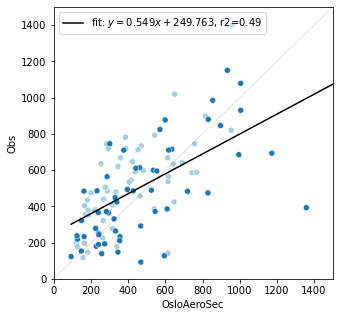

In [102]:
f, ax = plt.subplots(figsize=[5,5])
_df = df_100
v_x  = 'OsloAeroSec'
v_y = 'Obs'
sns.scatterplot(x=v_x,y=v_y, hue='year',data=_df, 
    
                palette='Paired')
ax.legend(loc=1)
lab,li = add_reg(v_x, v_y, _df, ax)
ax.set_xlim([0,1500])
ax.set_ylim([0,1500])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.1)
ax.legend(li, [lab,])

coefficient of determination: 0.4833403986947623
intercept: [255.14478949]
slope: [[0.50925453]]


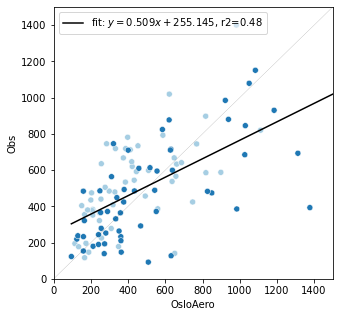

In [103]:
f, ax = plt.subplots(figsize=[5,5])
_df = df_100
v_x  = 'OsloAero'
v_y = 'Obs'
sns.scatterplot(x=v_x,y=v_y, hue='year',data=_df, 
    
                palette='Paired')
ax.legend(loc=1)
lab,li = add_reg(v_x, v_y, _df, ax)
ax.set_xlim([0,1500])
ax.set_ylim([0,1500])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.1)
ax.legend(li, [lab,])

In [76]:
df_OA = get_common_df('OA')

df_OA = df_OA.loc['2012-01-01':'2014-01-01']

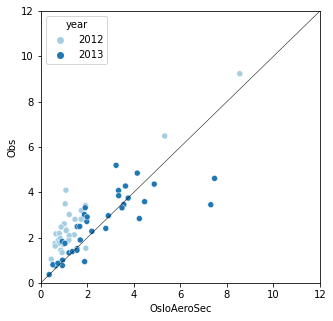

In [68]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAeroSec',y='Obs', hue='year',data=df_OA, 
                palette='Paired')

ax.set_xlim([0,12])
ax.set_ylim([0,12])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)


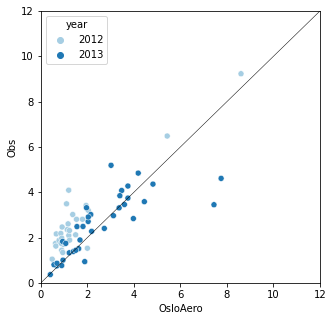

In [70]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAero',y='Obs', hue='year',data=df_OA, 
                palette='Paired')

ax.set_xlim([0,12])
ax.set_ylim([0,12])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)


In [72]:
df_TC = get_common_df('T_C')

df_TC = df_TC.loc['2012-01-01':'2014-01-01']

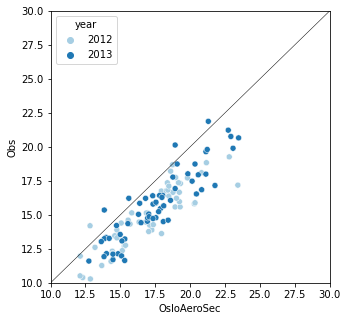

In [79]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAeroSec',y='Obs', hue='year',data=df_TC, 
                palette='Paired')

ax.set_xlim([10,30])
ax.set_ylim([10,30])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)


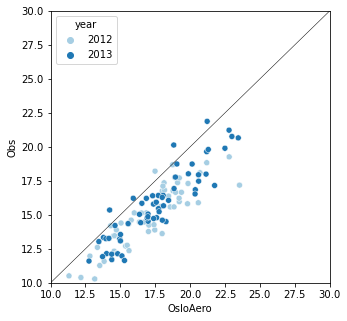

In [78]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAero',y='Obs', hue='year',data=df_TC, 
                palette='Paired')

ax.set_xlim([10,30])
ax.set_ylim([10,30])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)
